In [2]:
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore', FutureWarning)

plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
import pandas as pd

df = pd.read_csv('data/quote.csv', encoding='SJIS', skiprows=2, index_col=0)
df = df.reset_index()[['index', 'USD']]
df['index'] = pd.to_datetime(df['index'])

#weekly_df = df.groupby(pd.Grouper(key='index', freq='W')).mean().reset_index()
#weekly_df.columns = ['ds', 'y']
#display(weekly_df)
df.columns = ['ds', 'y']
display(df)


,ds,y
0,2002-04-01,133.15
1,2002-04-02,133.20
2,2002-04-03,133.20
3,2002-04-04,133.10
4,2002-04-05,132.30
...,...,...
4902,2022-04-04,122.44
4903,2022-04-05,122.58
4904,2022-04-06,123.90
4905,2022-04-07,123.66


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.13436
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1338.54    0.00570952       809.283           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1420.25     0.0116512       542.105           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1446.25   0.000787141       988.121      0.8197      0.8197      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1451.25   0.000173628       222.995           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1456.58   0.000178475       386.625           1           1      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

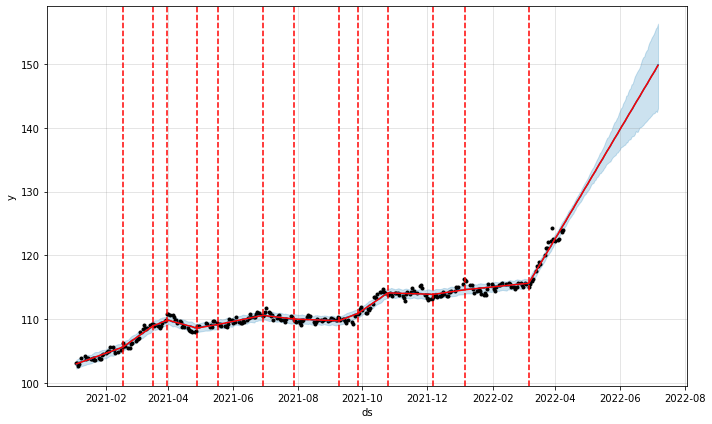

In [6]:
from prophet import Prophet
#import plotly.graph_objs as go
from prophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot

changepoints = [
    '2021-01-19 00:00:00',
    '2021-02-02 00:00:00',
    '2021-02-17 00:00:00',
    '2021-03-04 00:00:00',
    '2021-03-17 00:00:00',
    '2021-03-31 00:00:00',
    '2021-04-14 00:00:00',
    '2021-04-28 00:00:00',
    '2021-05-18 00:00:00',
    '2021-06-01 00:00:00',
    '2021-06-15 00:00:00',
    '2021-06-29 00:00:00',
    '2021-07-12 00:00:00',
    '2021-07-28 00:00:00',
    '2021-08-12 00:00:00',
    '2021-08-26 00:00:00',
    '2021-09-09 00:00:00',
    '2021-09-27 00:00:00',
    '2021-10-11 00:00:00',
    '2021-10-25 00:00:00',
    '2021-11-08 00:00:00',
    '2021-11-22 00:00:00',
    '2021-12-07 00:00:00',
    '2021-12-21 00:00:00',
    '2022-01-06 00:00:00',
    '2022-03-07 00:00:00'
]

m = Prophet(changepoints=changepoints)
m.fit(df[df['ds'] >= pd.Timestamp('2021/01/01')])

future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)

add_changepoints_to_plot(fig.gca(), m, forecast)
plot_components_plotly(m, forecast)
plot_plotly(m, forecast)